# Tabla tipo Excel

In [4]:
import pandas as pd
lista =[["Name","Position","Velocity"],["Alice",1,2.3],["Bob",3,4.2],["Charles",5,6],
                      ["Dante",7,8],["Elias",9,10],["Freya",11,12],["Gavo",13,14]]
tabla = pd.DataFrame(lista[1:],columns=lista[0])
display(tabla)
display(tabla.info())
display(tabla.describe())
display(tabla[["Velocity","Name"]])

,Name,Position,Velocity
0,Alice,1,2.3
1,Bob,3,4.2
2,Charles,5,6.0
3,Dante,7,8.0
4,Elias,9,10.0
5,Freya,11,12.0
6,Gavo,13,14.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7 non-null      object 
 1   Position  7 non-null      int64  
 2   Velocity  7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 296.0+ bytes


None

,Position,Velocity
count,7.000000,7.000000
mean,7.000000,8.071429
std,4.320494,4.220867
min,1.000000,2.300000
25%,4.000000,5.100000
50%,7.000000,8.000000
75%,10.000000,11.000000
max,13.000000,14.000000


,Velocity,Name
0,2.3,Alice
1,4.2,Bob
2,6.0,Charles
3,8.0,Dante
4,10.0,Elias
5,12.0,Freya
6,14.0,Gavo


# Matrices

In [5]:
import numpy as np
matriz_1 = np.array([[1+2.j,3-1.j],[-4+2.j,-1.j]])
matriz_2 = np.array([[1,0],[0,1]])
print("Suma:\n",matriz_1+matriz_2)
print("Producto:\n",matriz_1@matriz_2)
print("Producto elemento a elemento:\n",matriz_1*matriz_2)
print("Determinante matriz 1:\n",np.linalg.det(matriz_1))
print("Determinante matriz 2:\n",np.linalg.det(matriz_2))
print("Inversa matriz 1:\n",np.linalg.inv(matriz_1))
print("Inversa matriz 2:\n",np.linalg.inv(matriz_2))
a = np.array([[1, 2], [3, 5]])
a2 = np.array([[1, 2], [2, 4]])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
print("Solution:\n",x)
print("Rango Matriz:",np.linalg.matrix_rank(a2))


Suma:
 [[ 2.+2.j  3.-1.j]
 [-4.+2.j  1.-1.j]]
Producto:
 [[ 1.+2.j  3.-1.j]
 [-4.+2.j  0.-1.j]]
Producto elemento a elemento:
 [[ 1.+2.j  0.+0.j]
 [-0.+0.j  0.-1.j]]
Determinante matriz 1:
 (12-11.000000000000002j)
Determinante matriz 2:
 1.0
Inversa matriz 1:
 [[ 0.04150943-0.04528302j -0.17735849-0.07924528j]
 [ 0.26415094+0.0754717j  -0.03773585+0.13207547j]]
Inversa matriz 2:
 [[1. 0.]
 [0. 1.]]
Solution:
 [-1.  1.]
Rango Matriz: 1


# Integrales, derivadas y solución de ecuaciones diferenciales

In [6]:
from math import cos, exp, pi
from scipy.integrate import quad

f = lambda x: exp(cos(-2 * x * pi)) + 3.2

res, err = quad(f, -2, 2)

print("El resultado de la integral es {0} ({1})"
    .format(res, err))

El resultado de la integral es 17.864263511008033 (1.5512094454703522e-11)


In [32]:
from scipy.misc import derivative
f = lambda x: x**3 + x**2
print("Derivada:",derivative(f, 1.0, dx=1e-6))

Derivada: 4.999999999921734


/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_19552/851416168.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print("Derivada:",derivative(f, 1.0, dx=1e-6))


In [7]:
from scipy.integrate import solve_ivp
import numpy as np

f = lambda t, y: -2 * y * t

y0 = [1]           # initial value y0=y(t0)
t0 = 0             # integration limits for t: start at t0=0
tf = 2             # and finish at tf=2
x = 1

sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, t_eval=[x])  # computation of SOLution 

print("Resultado de la ecuación diferencial en el punto x: ",sol.y[0,0])

Resultado de la ecuación diferencial en el punto x:  0.36799888294287614


Text(0, 0.5, 'y(t)')

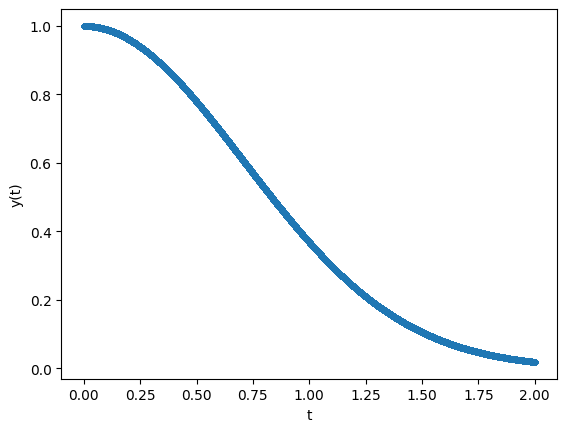

In [11]:
import matplotlib.pyplot as plt
ts = np.linspace(t0, tf, 1000000)  # 100 points between t0 and tf
sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, t_eval=ts) 

plt.plot(sol.t, sol.y[0], '.')
plt.xlabel('t'); plt.ylabel('y(t)')

In [12]:
from sympy import integrate, init_printing
from sympy.abc import x
init_printing(use_latex="mathjax")
f = x**2 - 3*x + 2
integrate(f)

 3      2      
x    3⋅x       
── - ──── + 2⋅x
3     2        

# Mecánica cuántica

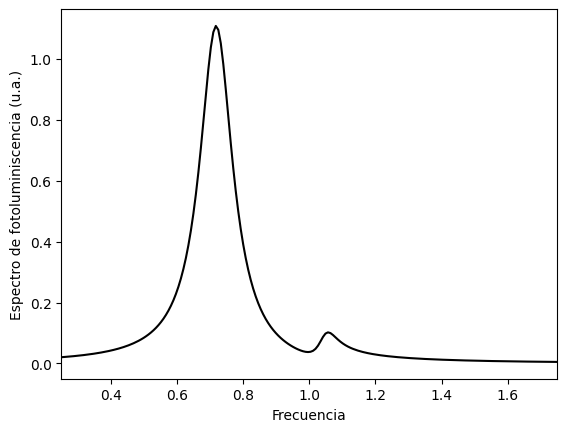

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

N = 4                      # number of cavity fock states
wc = 1.0 * 1.5 * np.pi
wa = 1.0 * 2 * np.pi  # cavity and atom frequency
g  = 0.1 * 2 * np.pi       # coupling strength
kappa = 0.75               # cavity dissipation rate
gamma = 0.25               # atom dissipation rate

# Jaynes-Cummings Hamiltonian
a  = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
sm = qutip.tensor(qutip.qeye(N), qutip.destroy(2))
H = wc*a.dag()*a + wa*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())

# collapse operators
n_th = 0.25
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]

wlist2 = np.linspace(0.25, 1.75, 200) * 2 * np.pi
spec2 = qutip.spectrum(H, wlist2, c_ops, a.dag(), a)

# plot the spectra
fig, ax = plt.subplots(1, 1)
ax.plot(wlist2 / (2 * np.pi), spec2, 'k')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Espectro de fotoluminiscencia (u.a.)')
ax.set_xlim(wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))
plt.show()